In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
Metadata=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv")
Metadata.head(2)

Unnamed: 0  label             0             1             2             3  \
0           0    0.0  1.348536e-10  4.485844e-10 -3.462068e-10 -3.291245e-10   
1           1    0.0  5.237528e-10  5.129825e-10 -9.563756e-11 -1.410408e-10   

              4             5             6             7      ...       \
0 -1.034517e-10 -6.298884e-11 -2.943444e-10  2.792682e-10      ...        
1 -1.581939e-11 -2.503525e-10 -4.600417e-10  3.559993e-10      ...        

           1418          1419          1420          1421          1422  \
0  2.179460e-10  5.827360e-11 -1.493066e-10  5.830621e-10  3.932456e-10   
1  1.422360e-10  5.713910e-11 -6.507376e-10  9.231440e-10  4.240692e-10   

           1423          1424          1425          1426          1427  
0  2.237174e-10  3.116949e-10  6.348504e-11 -2.940855e-10 -7.326263e-10  
1  2.814102e-10 -6.047472e-10 -3.311017e-10 -1.773615e-10 -1.007983e-09  

[2 rows x 1430 columns]

In [3]:
X=Metadata.iloc[:,2:]
y=Metadata['label']
X.shape,y.shape

((3783, 1428), (3783,))

In [ ]:
# TSNE

In [4]:
import sys
import os

from scipy import linalg as LA


np.set_printoptions(precision=3, linewidth=110, suppress=True)




def LDA(data, labels, dim_rescale):
    '''
    Linear Discriminant Analysis
    pass in:
        (i) a raw data array--features encoded in the cols;
            one data instance per row;
        (ii) EV, explanatory variable, is included in D as last column;
        (iii) the LDA flag is set to False so PCA is the default techique;
            if both LDA & EV are set to True then LDA is performed
            instead of PCA
    returns:
        (i) eigenvalues (1D array);
        (ii) eigenvectors (2D array)
        (iii) covariance matrix
    some numerical assertions:
    >>> # sum of the eigenvalues is equal to trace of R
    >>> x = R.trace()
    >>> x1 = eva.sum()
    >>> NP.allclose(x, x1)
    True
    >>> # determinant of R is product of eigenvalues
    >>> q = LA.det(R)
    >>> q1 = NP.prod(eva)
    >>> NP.allclose(q, q1)
    True
    '''
    assert data.shape[0] == labels.shape[0]
    # mean center the data array
    data -= data.mean(axis=0)
    nrow, ndim = data.shape
    # pre-allocate sw, sb arrays (both same shape as covariance matrix)
    # s_wc: array encoding 'within class' scatter
    # s_bc: array encoding 'between class' scatter
    s_wc = np.zeros((ndim, ndim))
    s_bc = np.zeros((ndim, ndim))
    R = np.cov(data.T)
    classes = np.unique(labels)
    for c in range(len(classes)):
        # create an index only for data rows whose class label = classes[c]
        idx = np.squeeze(np.where(labels == classes[c]))
        d = np.squeeze(data[idx,:])
        class_cov = np.cov(d.T)
        s_wc += float(idx.shape[0]) / nrow * class_cov
    s_bc = R - s_wc
    # now solve for w then compute the mapped data
    evals, evecs = LA.eig(s_wc, s_bc)
    np.ascontiguousarray(evals)
    np.ascontiguousarray(evecs)
    # sort the eigenvectors based on eigenvalues sort order
    idx = np.argsort(evals)
    idx = idx[::-1]
    evecs = evecs[:,idx]
    # take just number of eigenvectors = dim_rescale
    evecs_dr = evecs[:,:dim_rescale]
    # multiply data array & remaining set of eigenvectors
    rescaled_data = np.dot(data, evecs_dr)
    return rescaled_data, evecs_dr

In [5]:
#rescaled_data, w = LDA(X_WM_Row_scale, y_WM_Row_scale,50)
a, w1 = LDA(np.asarray(X), np.asarray(y), 50)# X_WM_Row_scale,y_WM_Row_scale

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=3, init='pca')
Y = tsne.fit_transform(a)

(1577, 2) (2206, 2)
tSNE_KDE_plot_edit_2.png


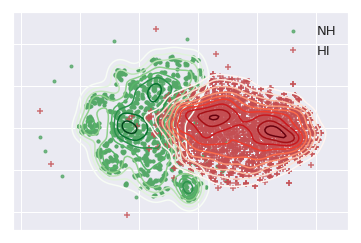

In [7]:
#lb2="Fast RT"
#lb3="Medium RT"
lb1="NH"
lb2="HI"
fileName="tSNE_KDE_plot_edit_2"

a1=Y[np.where(y==0), 0]
b1=Y[np.where(y==0), 1]
c1= Y[np.where(y==1), 0]
d1 = Y[np.where(y==1), 1]
# e1= Y[np.where(y==2), 0]
# f1 = Y[np.where(y==2), 1]

dftt1=pd.concat([pd.DataFrame(a1),pd.DataFrame(b1)], axis=0).transpose()
dftt2=pd.concat([pd.DataFrame(c1),
                pd.DataFrame(d1)], axis=0).transpose()
# dftt3=pd.concat([pd.DataFrame(e1),
#                 pd.DataFrame(f1)], axis=0).transpose()
print dftt1.shape,dftt2.shape#,dftt3.shape
dftt1.columns= ['a','b']
dftt2.columns= ['c','d']
#dftt3.columns= ['e','f']
ax = sns.kdeplot(dftt1['a'],dftt1['b'], cmap="Greens", shade=False, shade_lowest=False)
ax = sns.regplot(dftt1['a'], dftt1['b'],marker= '.', color='g',  fit_reg=False,label=lb1)
ax.legend(loc="best",framealpha=0.0)
# #plt.legend(loc='upper left')
ax = sns.kdeplot(dftt2['c'],dftt2['d'],cmap="Reds", shade=False, shade_lowest=False)
ax = sns.regplot(dftt2['c'], dftt2['d'],marker= '+', color='r',  fit_reg=False, label=lb2)

# ax = sns.kdeplot(dftt3['e'],dftt3['f'],cmap="Blues", shade=False, shade_lowest=False)
# ax = sns.regplot(dftt3['e'], dftt3['f'],marker= '*', color='b',  fit_reg=False, label=lb3)
ax.legend(loc="best",framealpha=0.0)

# Add labels to the plot
red = sns.color_palette("Greens")[-2]
blue = sns.color_palette("Reds")[-2]
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticklabels([])
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

#sns.despine()
# Save image

save_format='png'
print str(fileName)+'.'+save_format
plt.savefig(fileName+'.'+save_format,dpi=300)

In [64]:
#Micro AUC for multiclass classification 

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve, auc
# from scipy import interp
# from sklearn import preprocessing

# def MulticlassAuc(y_test,y_p): # y_test, y_p is the test and predict data
#     lb = preprocessing.LabelBinarizer() # binarize the data
#     lb.fit(y_test)
#     n_classes=len(lb.classes_)
#     y_test_b=lb.transform(y_test)
#     y_p_b=lb.transform(y_p)

#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(3):
#         fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_p_b[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # First aggregate all false positive rates
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#     # Then interpolate all ROC curves at this points
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#     # Finally average it and compute AUC
#     mean_tpr /= n_classes

#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#     return roc_auc["macro"]

# Apply SVM on Data

In [8]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ])

In [9]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(3783, 1428) (3783,)
[  0.01   0.1    1.    10.   100.  ] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


In [10]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4,
                                                    random_state=42)
cv = ShuffleSplit(X_train.shape[0], test_size=0.4, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)

clf_Tune.fit(X_train,y_train)
print 'Finish tuning'    
    
    

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.5min finished


Finish tuning


In [48]:
#Micro AUC for multiclass classification 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn import preprocessing

def MulticlassAuc(y_test,y_p): # y_test, y_p is the test and predict data
    lb = preprocessing.LabelBinarizer() # binarize the data
    lb.fit(y_test)
    n_classes=len(lb.classes_)
    y_test_b=lb.transform(y_test)
    y_p_b=lb.transform(y_p)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_p_b[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return roc_auc["macro"]

In [49]:
from sklearn.metrics import classification_report

y_p = clf_Tune.best_estimator_.predict(X_test)
ACC=classification_report(y_test, y_p)
print ACC
ACC_AVG=accuracy_score(y_test, y_p)
print ACC_AVG

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
AUC_Th2_T=metrics.auc(fpr, tpr)
print AUC_Th2_T

             precision    recall  f1-score   support

          0       0.89      0.85      0.87       648
          1       0.89      0.92      0.91       866

avg / total       0.89      0.89      0.89      1514

0.8910171730515192
0.8860875887434779


Text(0.5,1,"Validation accuracy=0.881886293521, best {'C': 10.0, 'gamma': 0.0007}")

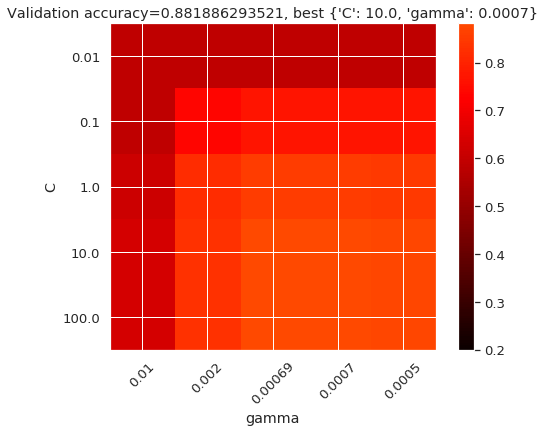

In [50]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
scores = clf_Tune.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
#print scores.shape,len(C_range),len(gamma_range)
plt.figure(figsize=(8, 6))
#plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_))

#filename='ParameterTuning'
#save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
#plt.show()

# Find Significant correlation with stability selections 

### Make the dataset

In [68]:
# Pre Processing 

In [51]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(3783, 1428) (3783, 1)


# TSNE Visulaization

In [52]:
# import sys
# import os

# from scipy import linalg as LA


# np.set_printoptions(precision=3, linewidth=110, suppress=True)




# def LDA(data, labels, dim_rescale):
#     '''
#     Linear Discriminant Analysis
#     pass in:
#         (i) a raw data array--features encoded in the cols;
#             one data instance per row;
#         (ii) EV, explanatory variable, is included in D as last column;
#         (iii) the LDA flag is set to False so PCA is the default techique;
#             if both LDA & EV are set to True then LDA is performed
#             instead of PCA
#     returns:
#         (i) eigenvalues (1D array);
#         (ii) eigenvectors (2D array)
#         (iii) covariance matrix
#     some numerical assertions:
#     >>> # sum of the eigenvalues is equal to trace of R
#     >>> x = R.trace()
#     >>> x1 = eva.sum()
#     >>> NP.allclose(x, x1)
#     True
#     >>> # determinant of R is product of eigenvalues
#     >>> q = LA.det(R)
#     >>> q1 = NP.prod(eva)
#     >>> NP.allclose(q, q1)
#     True
#     '''
#     assert data.shape[0] == labels.shape[0]
#     # mean center the data array
#     data -= data.mean(axis=0)
#     nrow, ndim = data.shape
#     # pre-allocate sw, sb arrays (both same shape as covariance matrix)
#     # s_wc: array encoding 'within class' scatter
#     # s_bc: array encoding 'between class' scatter
#     s_wc = np.zeros((ndim, ndim))
#     s_bc = np.zeros((ndim, ndim))
#     R = np.cov(data.T)
#     classes = np.unique(labels)
#     for c in range(len(classes)):
#         # create an index only for data rows whose class label = classes[c]
#         idx = np.squeeze(np.where(labels == classes[c]))
#         d = np.squeeze(data[idx,:])
#         class_cov = np.cov(d.T)
#         s_wc += float(idx.shape[0]) / nrow * class_cov
#     s_bc = R - s_wc
#     # now solve for w then compute the mapped data
#     evals, evecs = LA.eig(s_wc, s_bc)
#     np.ascontiguousarray(evals)
#     np.ascontiguousarray(evecs)
#     # sort the eigenvectors based on eigenvalues sort order
#     idx = np.argsort(evals)
#     idx = idx[::-1]
#     evecs = evecs[:,idx]
#     # take just number of eigenvectors = dim_rescale
#     evecs_dr = evecs[:,:dim_rescale]
#     # multiply data array & remaining set of eigenvectors
#     rescaled_data = np.dot(data, evecs_dr)
#     return rescaled_data, evecs_dr



In [11]:
# #Micro AUC for multiclass classification 

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve, auc
# from scipy import interp
# from sklearn import preprocessing

# def MulticlassAuc(y_test,y_p): # y_test, y_p is the test and predict data
#     lb = preprocessing.LabelBinarizer() # binarize the data
#     lb.fit(y_test)
#     n_classes=len(lb.classes_)
#     y_test_b=lb.transform(y_test)
#     y_p_b=lb.transform(y_p)

#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     for i in range(3):
#         fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_p_b[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # First aggregate all false positive rates
#     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#     # Then interpolate all ROC curves at this points
#     mean_tpr = np.zeros_like(all_fpr)
#     for i in range(n_classes):
#         mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#     # Finally average it and compute AUC
#     mean_tpr /= n_classes

#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
#     return roc_auc["macro"]

### Randomized Logistic Regression 

In [12]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,
                                  LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm


# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [13]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=10).fit(X, y)
lars_cv.alphas_

array([0.002])

In [14]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas, random_state=42,max_iter=1000).fit(X, y)

[0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.   ]


In [15]:
clf.scores_

array([0.01 , 0.015, 0.055, ..., 0.4  , 0.   , 0.   ])

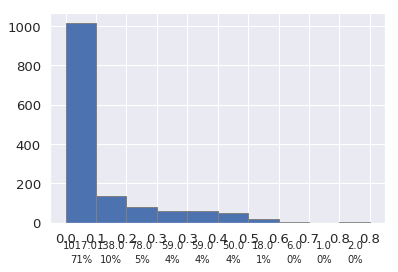

In [16]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [17]:
Th_2_Bins_Index= np.where((bins<=0.9) & (bins>=0.1)) # take the bins within a range
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.    0.084 0.169 0.253 0.338 0.422 0.507 0.591 0.676 0.76  0.845]
[0.169 0.253 0.338 0.422 0.507 0.591 0.676 0.76  0.845]


In [18]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(3783, 1428) (3783, 1)
(2269, 1428) (1514, 1428) (2269, 1) (1514, 1)


In [19]:
X_train[:,1:10]

array([[-2.99 , -0.516, -0.801, ..., -0.076, -1.877, -1.725],
       [ 1.004, -0.775, -0.657, ..., -0.007,  0.663,  0.709],
       [ 0.381,  1.046,  1.416, ...,  0.085,  1.001,  0.97 ],
       ...,
       [-0.557,  0.15 ,  0.013, ..., -0.148,  0.534,  0.772],
       [-0.723,  0.748,  0.812, ..., -0.034,  0.772, -0.134],
       [-0.184,  0.855,  0.676, ..., -1.105, -0.254, -0.296]])

In [20]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [21]:
C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))],y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]), 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [117]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))])

print accuracy_score(y_test, y_p)

0.8870541611624835


In [22]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
#gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
Bins=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.16899999999999998
(2269, 273)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.2min finished


(2269, 273) (2269, 1)
Finish tuning
Shape (1514, 273)
ACC 0.8877146631439894 0.8853373677757819
0.25349999999999995
(2269, 195)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   49.9s finished


(2269, 195) (2269, 1)
Finish tuning
Shape (1514, 195)
ACC 0.880449141347424 0.8784036153166255
0.33799999999999997
(2269, 136)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   37.0s finished


(2269, 136) (2269, 1)
Finish tuning
Shape (1514, 136)
ACC 0.8778071334214003 0.8725978673053345
0.4225
(2269, 77)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   25.4s finished


(2269, 77) (2269, 1)
Finish tuning
Shape (1514, 77)
ACC 0.8520475561426685 0.8526056368146439
0.5069999999999999
(2269, 27)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   15.4s finished


(2269, 27) (2269, 1)
Finish tuning
Shape (1514, 27)
ACC 0.8110964332892999 0.8096220739600263
0.5914999999999999
(2269, 9)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.3s finished


(2269, 9) (2269, 1)
Finish tuning
Shape (1514, 9)
ACC 0.6829590488771466 0.6811026288027827
0.6759999999999999
(2269, 3)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.1s finished


(2269, 3) (2269, 1)
Finish tuning
Shape (1514, 3)
ACC 0.6096433289299867 0.5566069341088586
0.7605
(2269, 2)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.1s finished


(2269, 2) (2269, 1)
Finish tuning
Shape (1514, 2)
ACC 0.5924702774108322 0.5313007869301172
0.845
(2269,)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
error at: 0.845


In [23]:
# accuracy_score(y_test, y_p)
# MulticlassAuc(y_test,y_p)

In [ ]:
        
#         ACC_Th2_T=accuracy_score(y_test, y_p)
#         AUC_Th2_T=MulticlassAuc(y_test,y_p)
#         print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
#         print 'ACC',ACC_Th2_T,AUC_Th2_T
#         ACC_Th2.append(ACC_Th2_T)
#         AUC_Th2.append(AUC_Th2_T)
#         Bins.append(i)
#     except:
#         print 'error at:',i
#     # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
#     # roc_auc_T = auc(false_positive_rate, true_positive_rate)
#     # print 'AUC',roc_auc_T
#     # AUC_Th2.append(roc_auc_T)

In [24]:
ACC_Th2 

[0.8877146631439894,
 0.880449141347424,
 0.8778071334214003,
 0.8520475561426685,
 0.8110964332892999,
 0.6829590488771466,
 0.6096433289299867,
 0.5924702774108322]

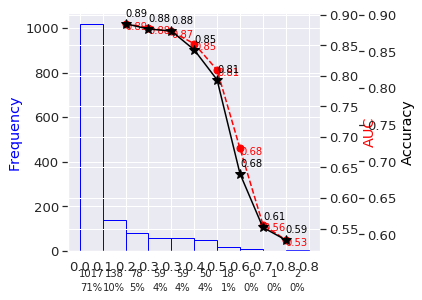

In [25]:
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,10,facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


bin_centers = 0.5 * np.diff(bins) + bins[:-1]







#show % value
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')



    
    
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed' )#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red')
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.2f" % j),xy=(i,j-0.01), color ='red') ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black')






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.2f" % j),xy=(i,j+0.01), color='black')##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black")
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')


    
    
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=0.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency')
ax.yaxis.label.set_color('Blue')
plt.tight_layout()
# #Save the image

filename='Corr_StabilitySelection_TH2'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



In [26]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
NumberofElement=[]
for i,j,k in zip(Th_2_Bins,ACC_Th2,AUC_Th2):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))

Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle']
Selected_Feature_Result

0.17 0.89 0.89 273
0.25 0.88 0.88 195
0.34 0.88 0.87 136
0.42 0.85 0.85 77
0.51 0.81 0.81 27
0.59 0.68 0.68 9
0.68 0.61 0.56 3
0.76 0.59 0.53 2


Threshold   ACC   AUC  NoEle
0      0.17  0.89  0.89    273
1      0.25  0.88  0.88    195
2      0.34  0.88  0.87    136
3      0.42  0.85  0.85     77
4      0.51  0.81  0.81     27
5      0.59  0.68  0.68      9
6      0.68  0.61  0.56      3
7      0.76  0.59  0.53      2

In [75]:
# Need to chage gamma range . It is selecting too many features

# Let 0.34 is our best Thr. TO get the index numer with this thr


fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=0.34)))
fealoc

# Do you get it? yes > How about number of support of the model?

array([  49,   58,   62,   85,  126,  154,  157,  166,  174,  178,  180,  184,  201,  217,  227,  229,  238,
        242,  248,  259,  262,  269,  272,  283,  286,  288,  306,  311,  321,  326,  337,  338,  345,  351,
        357,  361,  370,  379,  389,  404,  405,  427,  428,  438,  445,  462,  466,  472,  473,  476,  477,
        490,  491,  497,  499,  515,  525,  526,  532,  538,  545,  574,  590,  598,  605,  609,  615,  629,
        647,  658,  659,  670,  689,  694,  699,  740,  742,  744,  752,  762,  764,  801,  808,  813,  820,
        821,  827,  835,  843,  859,  881,  904,  909,  923,  938,  939,  942,  947,  956,  960,  996,  998,
       1000, 1006, 1024, 1069, 1092, 1102, 1126, 1136, 1153, 1156, 1157, 1161, 1170, 1171, 1177, 1195, 1206,
       1218, 1228, 1229, 1237, 1238, 1258, 1273, 1306, 1347, 1356, 1374, 1409, 1418, 1420, 1422, 1424, 1425])

In [76]:
ROI=fealoc%68
ROI
np.unique(ROI,return_counts=True)

(array([ 0,  1,  3,  4,  5,  8,  9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 27, 30, 34, 35, 37, 38,
        39, 42, 43, 44, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 60, 61, 62, 63, 64, 65, 66]),
 array([ 3,  3,  1,  6,  4,  1,  1,  3,  2,  9,  2,  2,  3,  1,  3,  2,  4,  2,  2,  1,  4,  3,  1,  1,  3,
         5,  1,  1,  3,  3,  1,  3,  7,  2,  1,  5,  3,  1,  7,  3,  1,  5,  1,  5, 10,  1]))

In [77]:
len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

46

In [126]:
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.38)))],y_train)
print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.38)))].shape ,y_train.shape
print 'Finish tuning'

# use tuned parameter on to get model
#y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

(2269, 108) (2269, 1)
Finish tuning


In [133]:
float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.38)))].shape[0]*100

60.59938298810048

In [ ]:
result it overfitting need to be less or equal to 40%

# Sultan----------->>>>>>>>>>>>>>>>>>>> End Here 

In [66]:
a=[0,1,7,8,68,1427]
b=np.array(a)
b%68

array([ 0,  1,  7,  8,  0, 67])

In [67]:
Desikan_Killiany =['bankssts L', 'bankssts R', 'caudalanteriorcingulate L', 
                   'caudalanteriorcingulate R', 'caudalmiddlefrontal L', 'caudalmiddlefrontal R', 
                   'cuneus L', 'cuneus R', 'entorhinal L', 'entorhinal R', 'frontalpole L', 
                   'frontalpole R', 'fusiform L', 'fusiform R', 'inferiorparietal L', 
                   'inferiorparietal R', 'inferiortemporal L', 'inferiortemporal R', 'insula L', 'insula R', 
                   'isthmuscingulate L', 'isthmuscingulate R', 'lateraloccipital L', 'lateraloccipital R', 
                   'lateralorbitofrontal L', 'lateralorbitofrontal R', 'lingual L', 'lingual R', 'medialorbitofrontal L', 
                   'medialorbitofrontal R', 'middletemporal L', 'middletemporal R', 'paracentral L', 'paracentral R',
                   'parahippocampal L', 'parahippocampal R', 'parsopercularis L', 'parsopercularis R', 'parsorbitalis L',
                   'parsorbitalis R', 'parstriangularis L', 'parstriangularis R', 'pericalcarine L', 'pericalcarine R', 
                   'postcentral L', 'postcentral R', 'posteriorcingulate L', 'posteriorcingulate R', 'precentral L', 
                   'precentral R', 'precuneus L', 'precuneus R', 'rostralanteriorcingulate L', 'rostralanteriorcingulate R', 
                   'rostralmiddlefrontal L', 'rostralmiddlefrontal R', 'superiorfrontal L', 'superiorfrontal R', 
                   'superiorparietal L', 'superiorparietal R', 'superiortemporal L', 'superiortemporal R', 'supramarginal L', 
                   'supramarginal R', 'temporalpole L','temporalpole R', 'transversetemporal L', 'transversetemporal R']


len(Desikan_Killiany)

NodeNameSerise=[]
for i in range(68):
    for j in range(68):
        if i==j:
            pass  
        elif i < j:
            pass        
        else:
            A=str(Desikan_Killiany[i]+'_'+Desikan_Killiany[j])
            NodeNameSerise.append(A)
            #RMat.append(M[i,j])
        
NodeNameSerise=np.asarray(NodeNameSerise)

for i in NodeNameSerise[Th2Index]:
    print i


isthmuscingulate R_cuneus R
medialorbitofrontal L_lingual R


In [1052]:
#NodeNameSerise[Th2Index]
Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=0.68)))
SelectedNames_Corr=pd.concat([pd.DataFrame(NodeNameSerise[Th2Index]),pd.DataFrame(clf.scores_[Th2Index])],axis=1)
SelectedNames_Corr.colums=['Name_Corr','Score_Corr']
#SelectedNames_Corr

In [1051]:
#NodeNameSerise[Th2Index]
SelectedNames_Corr=pd.concat([pd.DataFrame(NodeNameSerise[Th2Index]),pd.DataFrame(clf.scores_[Th2Index])],axis=1)
SelectedNames_Corr.colums=['Name_Corr','Score_Corr']
#SelectedNames_PTE
#Save as xlsx
Fname='SelectedNames_Corr.xlsx'
writer = pd.ExcelWriter(Fname, engine='xlsxwriter')
SelectedNames_Corr.to_excel(writer, sheet_name='Sheet1')
writer.save()


In [1053]:
#Corr_X = pd.ExcelFile("/home/ralfahad/Bidelman/PythonCode/SelectedNames_Corr.xlsx")
#SelectedNames_Corr = Corr_X.parse("Sheet1",header=0)
SelectedNames_Corr.columns=['Name_Corr','Score_Corr']
print SelectedNames_Corr.shape
FirstCorrNode=[]
SecCorrNode=[]
ForwardCorr=[]
BackwardCorr=[]
#SelectedNames_Corr.Name_Corr.str.split('_').tolist()[0][0]
for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
    FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
    SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
    ForwardCorr.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0] +'_'+ SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
    BackwardCorr.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1] +'_'+ SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
    #ForwardCorr.append()
FirstCorrNode=np.asarray(FirstCorrNode)  
SecCorrNode=np.asarray(SecCorrNode) 

print reduce(np.union1d,(FirstCorrNode,SecCorrNode))
print len(reduce(np.union1d,(FirstCorrNode,SecCorrNode)))






(8, 2)
['caudalmiddlefrontal R' 'inferiorparietal L' 'lateraloccipital L' 'lingual L' 'lingual R' 'middletemporal L'
 'paracentral R' 'parahippocampal R' 'parstriangularis L' 'precuneus R' 'rostralmiddlefrontal L'
 'superiorparietal L' 'superiortemporal R']
13


In [197]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
NumberofElement=[]
NumberofUniqueElement=[]

for i,j,k in zip(Th_2_Bins,ACC_Th2,AUC_Th2):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
    #print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))
    SelectedNames_Corr=pd.DataFrame(NodeNameSerise[Th2Index])
    SelectedNames_Corr.columns=['Name_Corr']
    FirstCorrNode=[]
    SecCorrNode=[]
    for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
        FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
        SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
    
    #FirstCorrNode=np.asarray(FirstCorrNode)  
    SecCorrNode=np.asarray(SecCorrNode) 

#print reduce(np.union1d,(FirstCorrNode,SecCorrNode))
    NumberofUniqueElement.append(len(reduce(np.union1d,(FirstCorrNode,SecCorrNode))))

Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),
                                  pd.DataFrame(NumberofUniqueElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEdge','UniqueNode']


#Save as xlsx
Fname='Selected_Feature_Result.xlsx'
writer = pd.ExcelWriter(Fname, engine='xlsxwriter')
Selected_Feature_Result.to_excel(writer, sheet_name='Sheet1')
writer.save()

Selected_Feature_Result




Threshold   ACC   AUC  NoEdge  UniqueNode
0      0.00  0.46  0.61    2278          68
1      0.08  0.88  0.91     613          68
2      0.17  0.91  0.93     408          68
3      0.26  0.92  0.94     273          68
4      0.34  0.90  0.93     183          68
5      0.42  0.89  0.91     109          64
6      0.51  0.85  0.88      54          53
7      0.59  0.71  0.78      16          24
8      0.68  0.57  0.68       8          13
9      0.76  0.47  0.60       4           8

In [199]:
# #concatenated_list = FirstCorrNode + SecCorrNode
# concatenated_list = [y for x in [FirstCorrNode,SecCorrNode] for y in x] 
# print len(reduce(np.union1d,concatenated_list))
# print len(reduce(np.union1d,concatenated_list))
# count,Node_Name=np.unique(concatenated_list,return_counts=True)
# pd.DataFrame(zip(count,Node_Name))#.shape

In [116]:
len(concatenated_list)

108

In [205]:
#Load BrainNetwork Tamplate

Desikan_Killiany_BN_Cordinates = pd.read_csv('/home/ralfahad/Bidelman/PythonCode/Desikan_Killiany_BN_Cordinates.csv', 
                   skiprows=[0],sep=' ')

Desikan_Killiany_BN_Cordinates.head()

#To write it

#Desikan_Killiany_BS_Cordinates.to_csv('Desikan_Killiany_BN_Cordinates.csv', sep=' ', header=False, index=False)


-54.343785  -44.539029   4.163784                 bankssts L  \
0   52.975610  -40.553816   5.303675                 bankssts R   
1   -5.030493   20.087970  28.999343  caudalanteriorcingulate L   
2    5.012041   22.258100  27.639678  caudalanteriorcingulate R   
3  -35.521824   10.809538  44.190969      caudalmiddlefrontal L   
4   35.661664   12.293548  44.471424      caudalmiddlefrontal R   

                  l.bankssts  
0                 r.bankssts  
1  l.caudalanteriorcingulate  
2  r.caudalanteriorcingulate  
3      l.caudalmiddlefrontal  
4      r.caudalmiddlefrontal

In [1068]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
NumberofElement=[]
NumberofUniqueElement=[]

for i,j,k in zip(Th_2_Bins,ACC_Th2,AUC_Th2):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
    #print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append(i)
    All_ACC.append(j)
    All_AUC.append(k)
    SelectedNames_Corr=pd.DataFrame(NodeNameSerise[Th2Index])
    SelectedNames_Corr.columns=['Name_Corr']
    FirstCorrNode=[]
    SecCorrNode=[]
    for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
        FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
        SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
    
    #FirstCorrNode=np.asarray(FirstCorrNode)  
    SecCorrNode=np.asarray(SecCorrNode) 

#print reduce(np.union1d,(FirstCorrNode,SecCorrNode))
    NumberofUniqueElement.append(len(reduce(np.union1d,(FirstCorrNode,SecCorrNode))))

Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),
                                  pd.DataFrame(NumberofUniqueElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEdge','UniqueNode']


Selected_Feature_Result




Threshold       ACC       AUC  NoEdge  UniqueNode
0      0.000  0.461905  0.606509    2278          68
1      0.085  0.879365  0.908458     613          68
2      0.170  0.909524  0.931264     408          68
3      0.255  0.922222  0.941057     273          68
4      0.340  0.904762  0.928021     183          68
5      0.425  0.885714  0.913892     109          64
6      0.510  0.847619  0.884296      54          53
7      0.595  0.709524  0.782567      16          24
8      0.680  0.573016  0.680210       8          13
9      0.765  0.471429  0.604855       4           8

In [1073]:
Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=0.695)))
#print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
NumberofElement.append(len(Th2Index))
ALL_Bins.append(i)
All_ACC.append(j)
All_AUC.append(k)
SelectedNames_Corr=pd.DataFrame(NodeNameSerise[Th2Index])
SelectedNames_Corr.columns=['Name_Corr']
FirstCorrNode=[]
SecCorrNode=[]
for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
    FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
    SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])

#FirstCorrNode=np.asarray(FirstCorrNode)  
SecCorrNode=np.asarray(SecCorrNode) 

#print reduce(np.union1d,(FirstCorrNode,SecCorrNode))
print pd.DataFrame(reduce(np.union1d,(FirstCorrNode,SecCorrNode)))

                         0
0    caudalmiddlefrontal R
1       inferiorparietal L
2       lateraloccipital L
3                lingual L
4                lingual R
5         middletemporal L
6            paracentral R
7        parahippocampal R
8       parstriangularis L
9              precuneus R
10  rostralmiddlefrontal L
11      superiorparietal L
12      superiortemporal R


In [304]:
Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=0.510)))
SelectedNames_Corr=pd.DataFrame(NodeNameSerise[Th2Index])
SelectedNames_Corr.columns=['Name_Corr']
FirstCorrNode=[]
SecCorrNode=[]
for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
    FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
    SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
#FirstCorrNode
#SecCorrNode
#reduce(np.union1d,(FirstCorrNode,SecCorrNode),count=True)

# Generate all connectivity matrix data for BrainNet

In [465]:
#Make group average COrr data
X_Raw= pd.DataFrame(abs(np.asarray(CorrDataAll)))
y=pd.DataFrame(np.asarray(TokenInfo))
y.columns=['Label']
Data_Label=pd.concat([X_Raw,y],axis=1)
Group_CorrCon=Data_Label.groupby(['Label']).mean()
Group_0CorrCon=Data_Label.groupby(['Label']).mean().loc[0,:]#.shape
Group_1CorrCon=Data_Label.groupby(['Label']).mean().loc[1,:]
Group_2CorrCon=Data_Label.groupby(['Label']).mean().loc[2,:]
Group_CorrCon.shape

(3, 2278)

In [863]:
Group_CorrCon.shape

(3, 2278)

In [864]:
import numpy, scipy.io
scipy.io.savemat('/home/ralfahad/Bidelman/PythonCode/GeneratedData/Group_CorrCon.mat',
                 mdict={'CorrData': np.asarray(Group_CorrCon)})

In [385]:
# Load Co-ordinateData
# CoordinateData=pd.read_csv(
#     '/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/DK_withCluste_Lobe.csv',
#     skiprows=[0],sep=',')
CoordinateData=pd.read_csv(
    '/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/DK_withCluste_Lobe.csv',
    sep=',')

Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=0.510)))
SelectedNames_Corr=pd.DataFrame(NodeNameSerise[Th2Index])
SelectedNames_Corr.columns=['Name_Corr']
FirstCorrNode=[]
SecCorrNode=[]
for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
    FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
    SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
a_count = Counter(FirstCorrNode+SecCorrNode)
df_a_count=pd.DataFrame(a_count.items())
df_a_count.columns=['Name','Count']
ConCat_Count=pd.merge(CoordinateData, 
         df_a_count,
         on='Name', how='outer')
ConCat_Count['Count'].fillna(0, inplace=True)
ConCat_Count['Count']=ConCat_Count['Count'].astype(int)
ConCat_Count['NodeName']=ConCat_Count['Name_BN']
ConCat_Count.drop(['Name','Name_BN','Lobe','Unnamed: 7'], axis=1, inplace=True)
ConCat_Count.head(2)



x          y         z  Cluster  Count    NodeName
0 -54.343785 -44.539029  4.163784        3      0  l.bankssts
1  52.975610 -40.553816  5.303675        3      2  r.bankssts

In [750]:
def CorrMat_flat_to_EdgeMat(CorrMat_flat,Th2Index):
    """
    This function convert flat corr matrix to connectivity matrix with specified 
    threshold (Th2Index)
    """
    A=np.zeros([68,68])
    count=0
    for i in range(68):
        for j in range(68):
            if i==j:
                pass  
            elif i < j:
                pass        
            else:
                if sum(count==Th2Index):
                    A[i,j]=CorrMat_flat[count]
                    A[j,i]=CorrMat_flat[count]
                count=count+1
    return(pd.DataFrame(A))
    #print count
    

In [954]:
BrainNet_Corr_Dir='/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/BraiNet_Corr/'
CoordinateData=pd.read_csv(
    '/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/DK_withCluste_Lobe.csv',
    sep=',')

dirs=['Group_0CorrCon','Group_1CorrCon','Group_2CorrCon']

for l,k in enumerate(dirs):
    print k
    for i,j in enumerate(Selected_Feature_Result.ACC):
        TV=Selected_Feature_Result.Threshold.loc[i]
        Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=TV)))
        # #Make node file
        SelectedNames_Corr=pd.DataFrame(NodeNameSerise[Th2Index])
        SelectedNames_Corr.columns=['Name_Corr']
        FirstCorrNode=[]
        SecCorrNode=[]
        for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
            FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
            SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
        a_count = Counter(FirstCorrNode+SecCorrNode)
        df_a_count=pd.DataFrame(a_count.items())
        df_a_count.columns=['Name','Count']
        ConCat_Count=pd.merge(CoordinateData, 
                 df_a_count,
                 on='Name', how='outer')
        ConCat_Count['Count'].fillna(0, inplace=True)
        ConCat_Count['Count']=ConCat_Count['Count'].astype(int)
        ConCat_Count['NodeName']=ConCat_Count['Name_BN']
        ConCat_Count.drop(['Name','Name_BN','Lobe','Unnamed: 7'], axis=1, inplace=True)
        # # Edge matrix
        A=CorrMat_flat_to_EdgeMat(Data_Label.groupby(['Label']).mean().loc[l,:],Th2Index)   
#         A.to_csv(BrainNet_Corr_Dir+str(k)+'/'+'DK_Edge_'+str("{0:.2f}".format(j))+'.edge', 
#                                               sep=' ', header=False, index=False)
#         ConCat_Count.to_csv(BrainNet_Corr_Dir+str(k)+'/'+'DK_Node_'+str("{0:.2f}".format(j))+'.node', 
#                                               sep=' ', header=False, index=False)


Group_0CorrCon
Group_1CorrCon
Group_2CorrCon


# Make files with shortNames


In [994]:
#CorrMat_flat_to_EdgeMat(Data_Label.groupby(['Label']).mean().loc[l,:],Th2Index)
CoordinateData_withShortName=pd.read_csv(
    '/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/DK_withCluste_Lobe_WithShortName.csv',
    sep=',')
BrainNet_Corr_Dir='/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/CorrWithShortName/'
# CoordinateData=pd.read_csv(
#     '/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/DK_withCluste_Lobe.csv',
#     sep=',')

dirs=['Group_0CorrCon','Group_1CorrCon','Group_2CorrCon']

for l,k in enumerate(dirs):
    print k
    for i,j in enumerate(Selected_Feature_Result.ACC):
        TV=Selected_Feature_Result.Threshold.loc[i]
        Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=TV)))
        # #Make node file
        SelectedNames_Corr=pd.DataFrame(NodeNameSerise[Th2Index])
        SelectedNames_Corr.columns=['Name_Corr']
        FirstCorrNode=[]
        SecCorrNode=[]
        for i in range(len(SelectedNames_Corr.Name_Corr.str.split('_').tolist())):
            FirstCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][0])
            SecCorrNode.append(SelectedNames_Corr.Name_Corr.str.split('_').tolist()[i][1])
        a_count = Counter(FirstCorrNode+SecCorrNode)
        df_a_count=pd.DataFrame(a_count.items())
        df_a_count.columns=['Name','Count']
        ConCat_Count=pd.merge(CoordinateData_withShortName, 
                 df_a_count,
                 on='Name', how='outer')
        ConCat_Count['Count'].fillna(0, inplace=True)
        ConCat_Count['Count']=ConCat_Count['Count'].astype(int)
        ConCat_Count['NodeName']=ConCat_Count['Name_BN']
        ConCat_Count.drop(['Name','Name_BN','Lobe','Abrriviation',
                          'Unnamed: 9','NodeName'
                          ], axis=1, inplace=True)
        columnsTitles = ['x','y','z','Cluster','Count','Shortname']

        frame = ConCat_Count.reindex(columns=columnsTitles)
        # # Edge matrix
        A=CorrMat_flat_to_EdgeMat(Data_Label.groupby(['Label']).mean().loc[l,:],Th2Index)
        A.to_csv(BrainNet_Corr_Dir+str(k)+'/'+'DK_Edge_'+str("{0:.2f}".format(j))+'.edge', 
                                              sep=' ', header=False, index=False)
        frame.to_csv(BrainNet_Corr_Dir+str(k)+'/'+'DK_Node_'+str("{0:.2f}".format(j))+'.node', 
                                              sep=' ', header=False, index=False)





Group_0CorrCon
Group_1CorrCon
Group_2CorrCon


In [976]:
ConCat_Count.head()

x          y          z  Cluster Shortname  Count
0 -54.343785 -44.539029   4.163784        3      lBKS      0
1  52.975610 -40.553816   5.303675        3      rBKS      0
2  -5.030493  20.087970  28.999343        5      lCAC      0
3   5.012041  22.258100  27.639678        5      rCAC      0
4 -35.521824  10.809538  44.190969        1      ICMF      0

 60 22


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

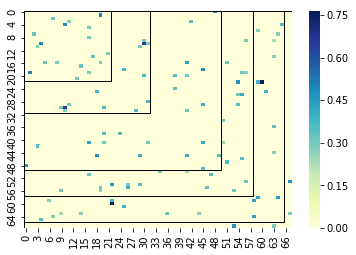

In [784]:
def conn_plot(Group):
    ConCat_Count['ind']=np.arange(68)
    SortedInd=ConCat_Count.sort_values(by=['Cluster'])['ind']
    SortedNN=ConCat_Count.sort_values(by=['Cluster'])['NodeName']
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=0.510)))
    #For group 0
    l=2
    A_V1=CorrMat_flat_to_EdgeMat(Data_Label.groupby(['Label']).mean().loc[Group,:],Th2Index)
    A_Null=np.zeros([68,68])

    for ic,i in enumerate(SortedInd):
        for jc,j in enumerate(SortedInd):
            if i==j:
                pass  
            elif i < j:
                pass        
            else:
                #print i,j,ic,jc,A.loc[ic,jc]
                #print ic,jc,A_V1.iloc[ic,jc]
                A_Null[i,j]= A_V1.iloc[ic,jc]
                A_Null[j,i]= A_V1.iloc[ic,jc]
                #A_Null[j,i]= 1
                #A_Null[i,j]= 1
                #print A_V1.loc[ic,jc]
                if A_V1.iloc[ic,jc]==0.7658232586620661:
                    print i,j
    

    SortedNN_1=SortedNN.reset_index(drop=True)
    # Plot lobe based connectivity matrix
    ax = sns.heatmap(A_Null,cmap="YlGnBu")
    NumberCount=ConCat_Count.groupby(['Cluster']).count().Count
    NumberCount_cum=np.cumsum(NumberCount)
    for i in NumberCount_cum:
        ax.add_patch(patches.Rectangle((0, 0), i, i,fill=False))
    ax.plot([0,0], [68,68])
#     for _, spine in ax.spines.items():
#         spine.set_visible(False)
#     # ADDED: Remove labels.
#     ax.axes.get_xaxis().set_ticklabels([])    
#     ax.axes.get_yaxis().set_ticklabels([])
    return(A_Null)
conn_plot(2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

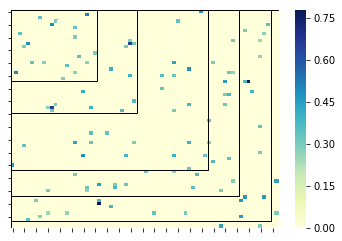

In [769]:
conn_plot(1)

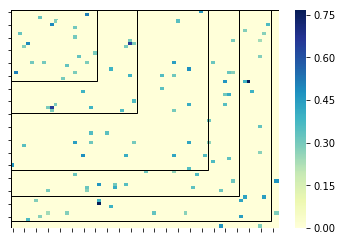

In [770]:
A2=conn_plot(2)

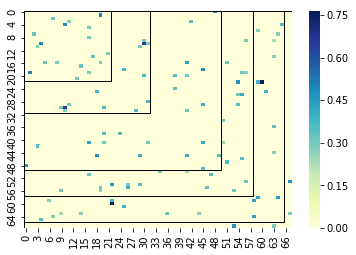

In [782]:
A3=conn_plot(2)

60 22


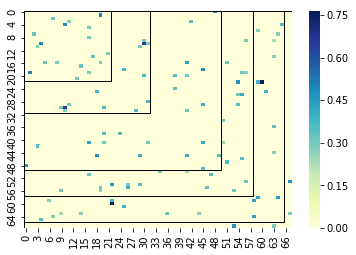

In [785]:
A3=conn_plot(2)

In [780]:
A3[A3>=0.7]
np.where(np.asarray(A3)==0.76582326)

(array([], dtype=int64), array([], dtype=int64))

In [809]:
# AllEdgeNameMatrix=np.zeros([68,68])
# for ic,i in enumerate(Desikan_Killiany):
#     for jc,j in enumerate(Desikan_Killiany):
#         print i,j
#         #AllEdgeNameMatrix.append(i+'_'+j)
#         #AllEdgeNameMatrix[ic,jc]=str(i+'_'+j)

In [810]:
#pd.DataFrame(np.asarray(AllEdgeNameMatrix).reshape(68,68))

In [ ]:
AllEdgeNameMatrix=Desk

In [1070]:
fileD='/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/BraiNet_Corr/Group_0CorrCon/'
Group0Data=pd.read_csv(fileD+'DK_Edge_0.85.edge',sep=' ',header=None)

#Desikan_Killiany[np.where(Group0Data>=0.5)]
SelectedNodeAvobeTH=[]
CorrThreshold=0.50
for FNC,FN in enumerate(np.where(Group0Data>=CorrThreshold)[0]):
    SN=Desikan_Killiany[np.where(Group0Data>=CorrThreshold)[1][FNC]]
    #print SN
    SelectedNodeAvobeTH.append(Desikan_Killiany[FN]+'_'+SN)
    
SelectedNodeAvobeTH[0:len(SelectedNodeAvobeTH)]



['insula L_isthmuscingulate R',
 'isthmuscingulate R_insula L',
 'isthmuscingulate R_precentral R',
 'parahippocampal R_precuneus R',
 'parsorbitalis L_transversetemporal R',
 'precentral R_isthmuscingulate R',
 'precuneus R_parahippocampal R',
 'transversetemporal R_parsorbitalis L']

In [1067]:
Node8=[]
for i in Edge8:
    Node8.append(i.split('_')[0])
    Node8.append(i.split('_')[1])
print np.asarray(Node8)
reduce(np.union1d,np.asarray(Node8))

['insula L' 'isthmuscingulate R' 'isthmuscingulate R' 'insula L' 'isthmuscingulate R' 'precentral R'
 'parahippocampal R' 'precuneus R' 'parsorbitalis L' 'transversetemporal R' 'precentral R'
 'isthmuscingulate R' 'precuneus R' 'parahippocampal R' 'transversetemporal R' 'parsorbitalis L']


array(['insula L', 'isthmuscingulate R', 'parahippocampal R', 'parsorbitalis L', 'precentral R',
       'precuneus R', 'transversetemporal R'], dtype='|S20')

In [894]:
fileD='/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/BraiNet_Corr/Group_1CorrCon/'
Group0Data=pd.read_csv(fileD+'DK_Edge_0.85.edge',sep=' ',header=None)

#Desikan_Killiany[np.where(Group0Data>=0.5)]
SelectedNodeAvobeTH=[]
CorrThreshold=0.50
for FNC,FN in enumerate(np.where(Group0Data>=CorrThreshold)[0]):
    SN=Desikan_Killiany[np.where(Group0Data>=CorrThreshold)[1][FNC]]
    #print SN
    SelectedNodeAvobeTH.append(Desikan_Killiany[FN]+'_'+SN)
    
SelectedNodeAvobeTH[0:len(SelectedNodeAvobeTH)]


['isthmuscingulate R_precentral R',
 'parahippocampal R_precuneus R',
 'parsorbitalis L_transversetemporal R',
 'precentral R_isthmuscingulate R',
 'precuneus R_parahippocampal R',
 'transversetemporal R_parsorbitalis L']

In [859]:
fileD='/home/ralfahad/Bidelman/PythonCode/GeneratedData/Connectivity_Data/BraiNet_Corr/Group_2CorrCon/'
Group0Data=pd.read_csv(fileD+'DK_Edge_0.85.edge',sep=' ',header=None)

#Desikan_Killiany[np.where(Group0Data>=0.5)]
SelectedNodeAvobeTH=[]
CorrThreshold=0.5
for FNC,FN in enumerate(np.where(Group0Data>=CorrThreshold)[0]):
    SN=Desikan_Killiany[np.where(Group0Data>=CorrThreshold)[1][FNC]]
    #print SN
    SelectedNodeAvobeTH.append(Desikan_Killiany[FN]+'_'+SN)
    #print 
    
SelectedNodeAvobeTH[0:len(SelectedNodeAvobeTH)/2]

['isthmuscingulate R_precentral R',
 'parahippocampal R_precuneus R',
 'parsorbitalis L_transversetemporal R']

In [871]:
# Load Generated network features form matlab
NetworkMeasuresName=['Charactersics_path',
'Average_clustering_coefficient', 
'Small_worldness',
'Assortativity',
'Global efficiency', 
'transitivity',
'maximized modularity']
Static_Group_NetworkMeasures = spio.loadmat(
    '/home/ralfahad/Bidelman/PythonCode/GeneratedData/Static_Group_NetworkMeasures_BootStrap_GruopData.mat',
                     squeeze_me=True)['featureMatrix']

# Clusters=pd.DataFrame(np.asarray(TokenInfo))
# Clusters.columns=["Cluster"]
# Static_Group_NetworkMeasures=pd.DataFrame(Static_Group_NetworkMeasures)
# Static_Group_NetworkMeasures.columns=NetworkMeasuresName
# df=pd.concat([Clusters, pd.DataFrame(Static_Group_NetworkMeasures)], axis=1)

# for i in NetworkMeasuresName:
#     x=df[df['Cluster']==0][i]
#     y=df[df['Cluster']==1][i]
#     z=df[df['Cluster']==2][i]
#     print stats.kruskal(x, y,z),i


GroupdataNetResult=pd.DataFrame(Static_Group_NetworkMeasures)
GroupdataNetResult.columns=NetworkMeasuresName

#Save as xlsx
Fname='GroupdataNetResult.xlsx'
writer = pd.ExcelWriter(Fname, engine='xlsxwriter')
GroupdataNetResult.to_excel(writer, sheet_name='Sheet1')
writer.save()










# Dynamic Connectivity Analysis

In [ ]:
#loop =[4,6,8,10, 12, 20] # loop over sample secound dividation
#Data to connectivity matrix xonversion 

def DatatoCorrMatrix(time,Data_All):
    #Define variables
    SamplingRate=128
    SampleLenght=128*63
    Ch=68
    PercentOverlap=0.25
    print 'sec:',time,'devide:',30720/time,'rmeainder:',30720%time
    SampleWindowSize= 512*time
    AllSmapleCorrVector=[]#np.array([])
    for Samples in range(0,Data_All.shape[0],68):
        OneSample= Data_All[Samples:(Samples+68), :-1]
        ar=rolling_window(OneSample, (Ch,SampleWindowSize), asteps=np.round(SampleWindowSize*(1-PercentOverlap)))
        #print ar.shape
        OneSmapleCorrVector=[]
        for i in range(ar.shape[1]):
            SS=ar[0][i][:,:]
            OneSmapleCorrVector.append(MatrixToCorrArray(SS))

        AllSmapleCorrVector.append(OneSmapleCorrVector)
    d1,d2,d3=np.asarray(AllSmapleCorrVector).shape
    All_reshape=np.asarray(AllSmapleCorrVector).reshape((d1*d2), d3)
    return All_reshape


In [378]:
import scipy.io as spio
ROI=68
DataLocation='/home/ralfahad/Matlab/AllBrainstormScoutFiles/'
CorrDataAll=[] # save all subjects corr data
PTEDataAll=[] # save all subjects corr data
SubInfo=[]
Cnt=0
#for i in range(1,36,1): # itterate through all subject
i=1
print 'Subject'+str(i)+'.mat'
Data_Mat_file='Subject'+str(i)+'.mat'
filepath = DataLocation+Data_Mat_file
S_Mat = spio.loadmat(filepath,squeeze_me=True)
#S_SubjectName=np.transpose(S_Label_Mat['SubjectName'])
S=S_Mat['Value']
#print S.shape
S_reshaped=S.reshape(S.shape[0]/ROI,ROI,S.shape[1]) # convert (56304, 500) to (828, 68, 500)
# #print S_reshaped.shape
# if i<=21: # some data name with T
#     MetadataSubjectName='S'+str(i)
# else:
#     MetadataSubjectName='T'+str(i-21)

# print MetadataSubjectName
# for j in range(3): # only consider 3 cluster label
#     Cluster0Data=S_reshaped[Metadata.index[(Metadata['Subject#']==MetadataSubjectName) & 
#          (Metadata['Cluster']!=3)& # do not consider cluster 3 as it is outlaier
#          (Metadata['Cluster']==j) #&
#         ]-Cnt].mean(axis=0)
#     #print Cluster0Data.shape
#    #PTEDataAll.append(MatrixToPTEArray(Cluster0Data))
#     try:
#         CorrDataAll.append(MatrixToCorrArray(Cluster0Data)) # Save corr data
#     except:
#         print 'Corr can not calcuate for sub:', MetadataSubjectName
#         pass
#     try:
#         PTEDataAll.append(MatrixToPTEArray(Cluster0Data)) # Save PTE data
#     except:
#         print 'PTE can not calcuate for sub:', MetadataSubjectName
#         pass
#     #save subject info
#     S_I=MetadataSubjectName+'_Corr_CL_'+str(j)
#     SubInfo.append(S_I)


# Cnt=Cnt+S_reshaped.shape[0]

Subject1.mat


In [380]:
S_reshaped.shape

(828, 68, 500)

In [8]:
import matlab.engine
eng = matlab.engine.start_matlab()
a=eng.triarea(nargout=0)

In [ ]:
a